# Compare Atomic Files


This notebook shows how to compare atomic files generated by Carsus.

In [1]:
import os
import logging
from carsus.io import AtomDataCompare

 ChiantiPy version 0.8.4 
 found PyQt5 widgets
 using PyQt5 widgets


In [2]:
ATOM1_PATH = os.environ.get("ATOM1_PATH", None)
ATOM2_PATH = os.environ.get("ATOM2_PATH", None)

In [3]:
path = "/home/atharva/workspace/code/tardis-main/carsus/kurucz_cd23_chianti_He_cmfgen_H_Si_I-II.h5"
path2 = "/home/atharva/workspace/code/tardis-main/refdata/atom_data/kurucz_cd23_chianti_H_He.h5"
atc = AtomDataCompare(path, path2)

A brief overview of what keys match can be seen using the comparison table.

In [4]:
atc.compare()

,exists_1,exists_2,match
atom_data,True,True,False
collision_data_temperatures,False,True,False
collisions,True,True,False
collisions_metadata,True,False,False
ionization_data,True,True,False
levels,True,True,False
lines,True,True,False
macro_atom_data,True,True,False
macro_atom_references,True,True,False
metadata,True,False,False


One can investigate further into the difference between the dataframes using the `key_diff` method.

In [5]:
atc.key_diff("levels")

In [6]:
atc.key_diff("lines")

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:124: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:125: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


One can also investigate specific ions:

In [7]:
atc.ion_diff("lines",(1,0))

In [8]:
atc.ion_diff("levels",(1,0))

,pct_change_energy,pct_change_g
level_number,,
1,0.000002,0.750000
2,0.156252,0.888889
3,0.199998,0.875000
4,0.074075,0.960000
5,0.085715,0.972222
6,0.092592,0.959184
7,0.097001,0.968750
8,0.099999,0.962963
9,0.053030,0.990000


Both the `ion_diff` and `key_diff` methods allow displaying detailed information:

In [9]:
atc.ion_diff("lines",(1,0), simplify_output=False)

But these complex dataframes can also be represented in smaller formats:

In [10]:
atc.ion_diff("lines","He",return_summary=True)

,total_rows,matches_line_id,matches_wavelength,matches_f_ul,matches_f_lu,matches_nu,matches_B_lu,matches_B_ul,matches_A_ul
values,174,0,0,0,0,0,0,0,0


Specific columns can be plotted:

[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:124: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1 = df1.loc[parsed_ion]
 (warnings.py:110)
[                py.warnings][WARNING] - /home/atharva/workspace/code/tardis-main/carsus/carsus/io/atom_data_compare.py:125: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2 = df2.loc[parsed_ion]
 (warnings.py:110)


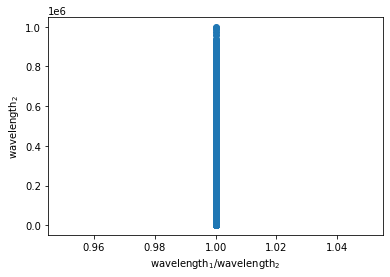

In [11]:
atc.plot_ion_diff(key_name="lines", ion="Fe", column="wavelength")

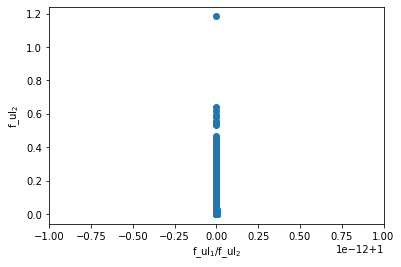

In [12]:
atc.plot_ion_diff(key_name="lines", ion=(23,0), column="f_ul")

The dataframes are available as attributes as well:

In [13]:
atc.lines1

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          22                 66                     1824   
                         29                 66                     1925   
                         37                 66                     2000   
                         38                 66                     2002   
                         44                 66                     2050   
...                                                                 ...   
14            1          98                 123                  559035   
                         101                123                  559110   
                         112                123                  559397   
                         114                123                  559445   
                         122                123                  559630   

                                                                  wavelength  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  1.640482e+04   
                         29                 66                  2.759203e+04   
                         37                 66                  4.382390e+04   
                         38                 66                  4.382397e+04   
                         44                 66                  6.790941e+04   
...                                                                      ...   
14            1          98                 123                 5.446845e+04   
                         101                123                 5.580668e+04   
                         112                123                 1.290000e+05   
                         114                123                 1.312000e+05   
                         122                123                 1.008000e+07   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000458   
                         29                 66                  0.001227   
                         37                 66                  0.000276   
                         38                 66                  0.002517   
                         44                 66                  0.000619   
...                                                                  ...   
14            1          98                 123                 0.036944   
                         101                123                 0.131156   
                         112                123                 0.348292   
                         114                123                 2.015917   
                         122                123                 0.014347   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000305   
                         29                 66                  0.000818   
                         37                 66                  0.000276   
                         38                 66                  0.001678   
                         44                 66                  0.000619   
...                                                                  ...   
14            1          98                 123                 0.380000   
                         101                123                 0.295100   
                         112                123                 1.929000   
                         114                123                 2.846000   
                         122                123                 0.079460   

                                                                     

In [14]:
atc.lines2

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          21                 67                     1823   
                         28                 67                     1923   
                         37                 67                     2001   
                         44                 67                     2052   
                         51                 67                     2107   
...                                                                 ...   
2             1          11                 21                   533410   
                         13                 21                   533412   
                                            22                   533413   
                         14                 23                   533414   
                         15                 24                   533415   

                                                                   wavelength  \
atomic_number ion_number level_number_lower level_number_upper                  
3             0          21                 67                   16404.775425   
                         28                 67                   27591.968635   
                         37                 67                   43823.900517   
                         44                 67                   67909.408678   
                         51                 67                  105557.600728   
...                                                                       ...   
2             1          11                 21                   10126.280000   
                         13                 21                   10126.505000   
                                            22                   10126.440000   
                         14                 23                   10126.440000   
                         15                 24                   10126.537000   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000503   
                         28                 67                  0.001349   
                         37                 67                  0.002767   
                         44                 67                  0.006208   
                         51                 67                  0.011721   
...                                                                  ...   
2             1          11                 21                  0.593500   
                         13                 21                  0.042400   
                                            22                  0.636000   
                         14                 23                  1.009500   
                         15                 24                  1.047000   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          21                 67                  0.000252   
                         28                 67                  0.000674   
                         37                 67                  0.001383   
                         44                 67                  0.003104   
                         51                 67                  0.005861   
...                                                                  ...   
2             1          11                 21                  0.890250   
                         13                 21                  0.042400   
                                            22                  0.848000   
                         14                 23                  1.346000   
                         15                 24                  1.308750   

                                                        

Finally, open HDF files can be closed.

In [15]:
atc.teardown()